<a href="https://colab.research.google.com/github/bellaabdelouahab/Colab-Notebooks/blob/main/TrafficSignsRecognationRGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
! pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions -h
!kaggle competitions download -c DATASET
from IPython.display import clear_output
clear_output(wait=True)
print("All Good")

All Good


In [11]:
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed
from IPython.display import clear_output
clear_output(wait=True)
print("DataSet Downloaded Seccessfully")

DataSet Downloaded Seccessfully


In [12]:
!mkdir trafficSigns
!unzip traffic-signs-preprocessed.zip -d trafficSigns
clear_output(wait=True)
print("file unziped seccessfully")

file unziped seccessfully


In [13]:
import pandas as pd
Data = pd.read_pickle("/content/trafficSigns/data0.pickle")

In [14]:
len(Data)

7

In [15]:
Data.keys()

dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])

In [16]:
X_train = Data["x_train"]
Y_train = Data["y_train"]
X_test = Data["x_test"]
Y_test = Data["y_test"]
X_validation = Data["x_validation"]
Y_validation = Data["y_validation"]
labels = Data["labels"]

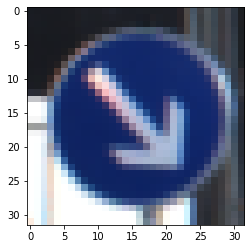

In [17]:
import matplotlib.pyplot as plt


s = Data["x_train"][2].swapaxes(0,1)
s = s.swapaxes(1,2)
plt.imshow(s)
plt.show()

In [18]:
X_train.shape

(86989, 3, 32, 32)

In [19]:
X_train = X_train.swapaxes(1,2)
X_train = X_train.swapaxes(2,3)

X_test = X_test.swapaxes(1,2)
X_test = X_test.swapaxes(2,3)

X_validation = X_validation.swapaxes(1,2)
X_validation = X_validation.swapaxes(2,3)

X_train.shape

(86989, 32, 32, 3)

In [20]:
len(labels)

43

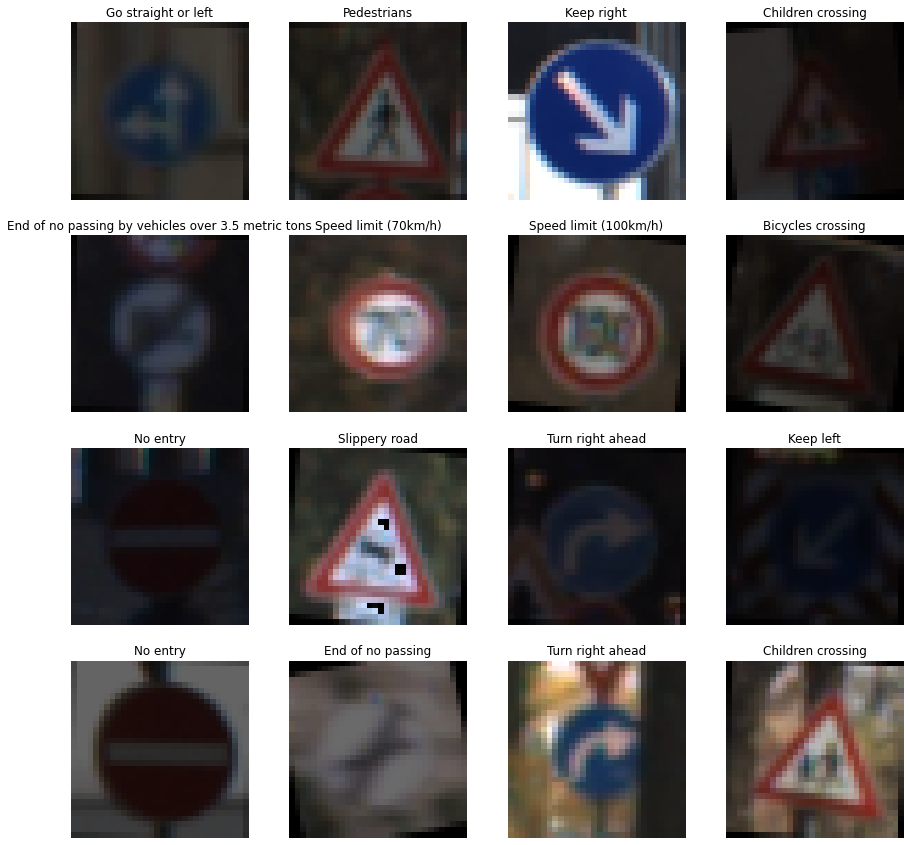

In [21]:
plt.figure(figsize=(15,15)) 

for i in range(16):
    plt.subplot(4,4,i+1)  
    plt.title(labels[Y_train[i]]) 
    plt.imshow(X_train[i])
    plt.axis("off")

plt.show()

In [22]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train,43)
Y_test = to_categorical(Y_test,43)
# Y_test = to_categorical(Y_test,43)

In [23]:
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras import Sequential

In [47]:
from numpy import matrix
Model = Sequential(
    [
     Conv2D(64, kernel_size = 3, padding = "Same", activation = "relu", input_shape = (32,32,3)),
     MaxPool2D(2),
     Flatten(),
     Dense(500, activation='relu'),
     Dense(43,activation="softmax")
    ]
)

In [48]:
Model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [49]:
Model.fit(X_train , Y_train , epochs=5)

Epoch 1/5
2719/2719 [==============================] - 297s 109ms/step - loss: 2.3058 - accuracy: 0.7303
Epoch 2/5
2719/2719 [==============================] - 301s 111ms/step - loss: 0.3451 - accuracy: 0.9179
Epoch 3/5
2719/2719 [==============================] - 300s 110ms/step - loss: 0.2592 - accuracy: 0.9414
Epoch 4/5
2719/2719 [==============================] - 305s 112ms/step - loss: 0.2226 - accuracy: 0.9510
Epoch 5/5
2719/2719 [==============================] - 301s 111ms/step - loss: 0.2048 - accuracy: 0.9594


In [50]:
Model.evaluate(X_test,Y_test)

395/395 [==============================] - 11s 26ms/step - loss: 2.0282 - accuracy: 0.8254


[2.028224229812622, 0.8254156708717346]

In [ ]:
predict = Model.predict(X_validation)

Go straight or left


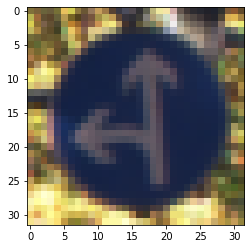

In [59]:
import numpy as np

pred = labels[np.argmax(predict[1])]

print(pred)

plt.imshow(X_validation[1]/255)
plt.show()